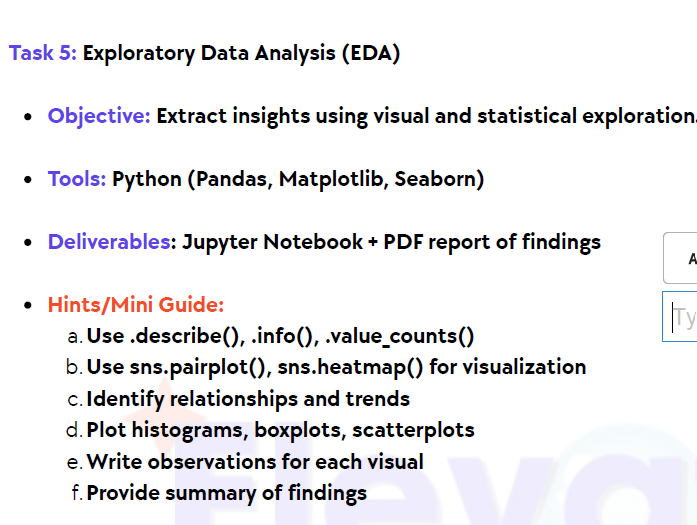

In [29]:
#we have to perform all the above operations on the titanic dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [30]:
df=pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.shape

(891, 12)

In [32]:
#lets perform some basic preprocesssing operations on the dataset

In [33]:
df.isna().sum() #there are null values in the age ,cabin , embarked 
#lets drop the null values from the dataset 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [35]:
# df.dropna(inplace=True)
#but dropping is not the correct way because
#due to dropping null we can lose around ~80% of the dataset 
#so lets make a new feature name is_cabin and output is yes and no 
df['is_cabin']=df['Cabin'].notnull().astype('int')

In [36]:
#so we have made it
#lets drop the cabin column
df.drop(columns=['Cabin'],inplace=True)

In [37]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()
#we also have to handle the  null avlues in the age lets impute them 
#because it is also a 30% of the dataset 
# 

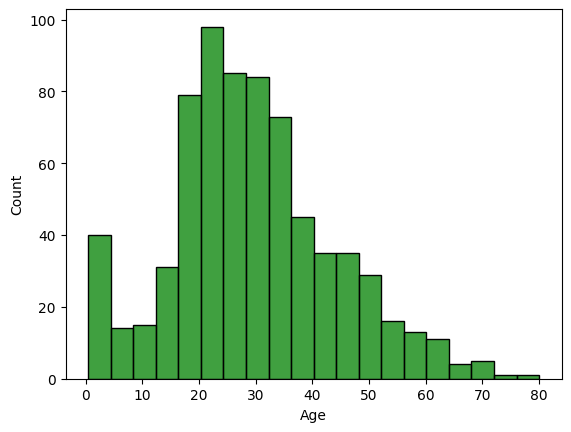

In [43]:
#lets check the distribution of the age then we impute the null values in the age column

sns.histplot(df['Age'],color='green')
plt.show()
#so the distribution is right skewed 
#so filling with the median value is the best option that we have 


In [44]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
is_cabin       0
dtype: int64

In [49]:

df['Embarked'].value_counts()
#lets fill it with the s because it is the most frequent value 
df['Embarked']=df['Embarked'].fillna('S')


In [50]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
is_cabin       0
dtype: int64

In [51]:
#SO WE HAVE SUCCESSFULLY HANDLED ALL THE NULL VALUES PRESENT IN THE DATASET 

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [52]:
#LETS PERFORM REQUIRED EDA OPERATION ON THE DATASET 
df.describe() #it returns the 5 number summary of the numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  is_cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


#### PAIRPLOT

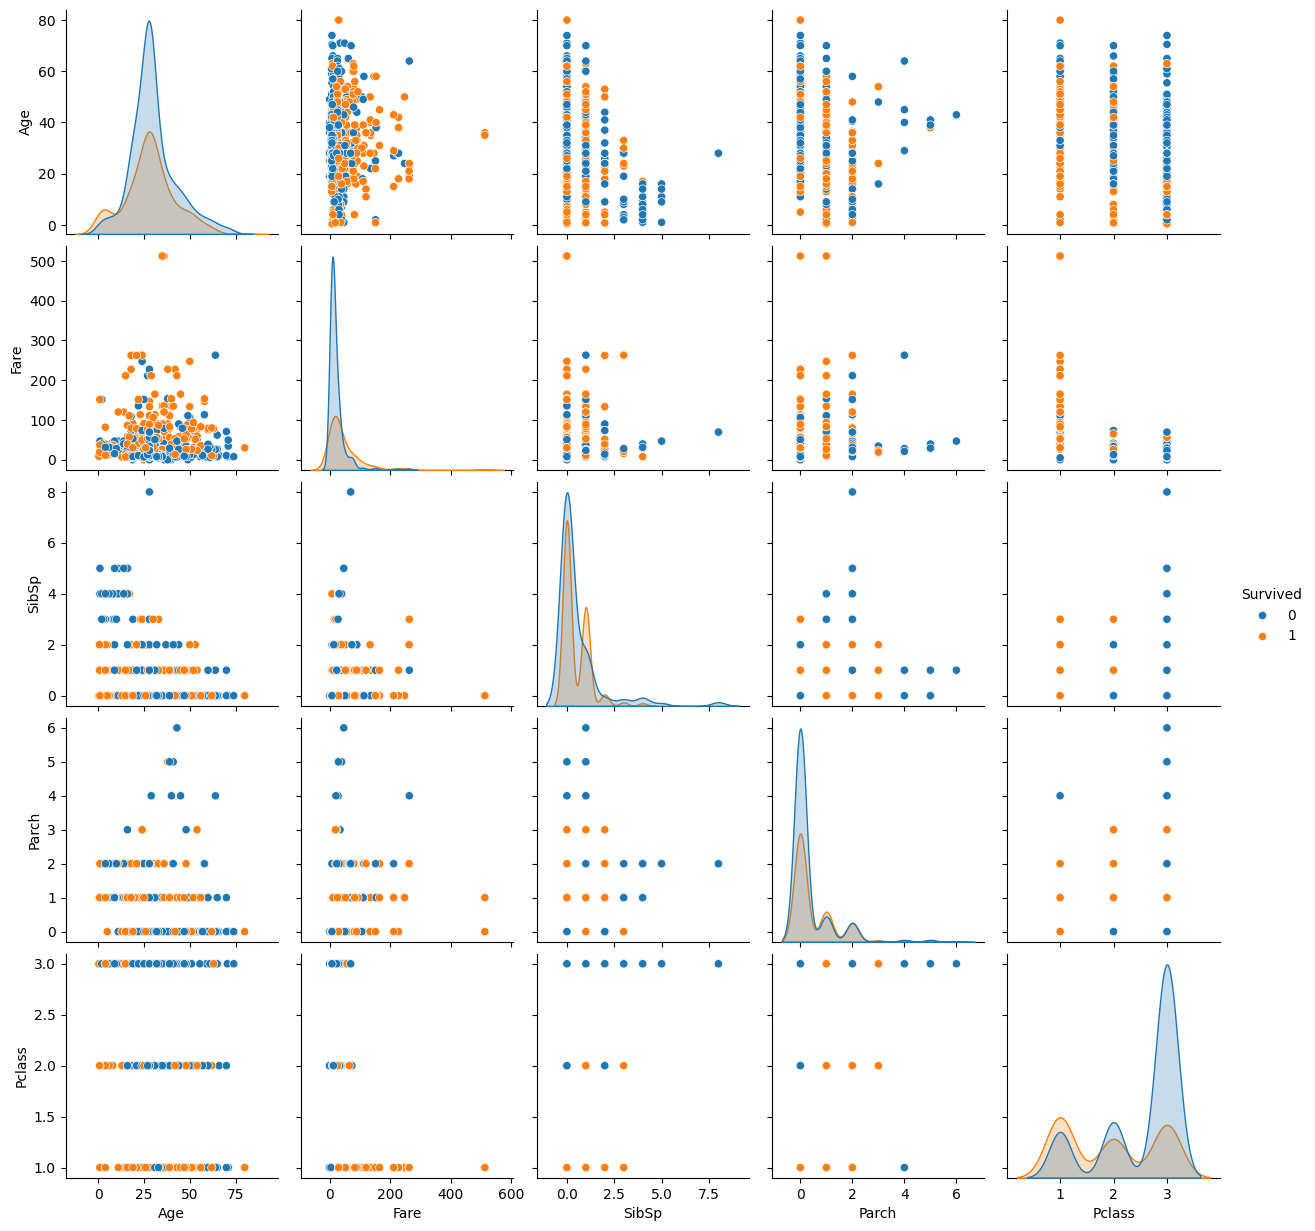

In [70]:
#we have to plot only the numerical columns into this plot 
columns=['Age','Fare','SibSp','Parch','Pclass']
sns.pairplot(df[columns+['Survived']],kind='scatter',diag_kws={'color':'red'},hue='Survived',diag_kind='kde')
plt.show()

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### Heatmap

In [ ]:
# categorical colummns=['Sex','is_cabin','Survived','Embarked'] 

In [ ]:
#relationship between the input and output columns

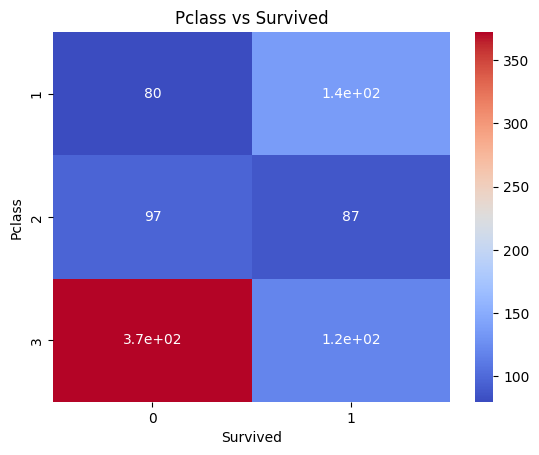

In [82]:
#for this we required a contigency table
t1=pd.crosstab(df['Pclass'],df['Survived'])
sns.heatmap(t1,cmap='coolwarm',annot=True)
plt.title('Pclass vs Survived')
plt.show()

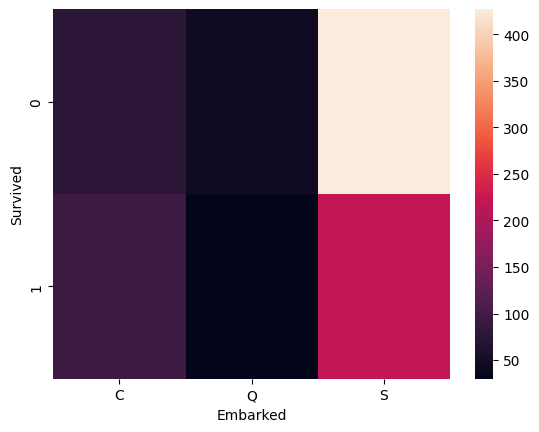

In [85]:
t2=pd.crosstab(df['Survived'],df['Embarked'])
sns.heatmap(t2)
plt.show()

Available Seaborn colormaps: ['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6']


<Axes: xlabel='is_cabin', ylabel='Survived'>

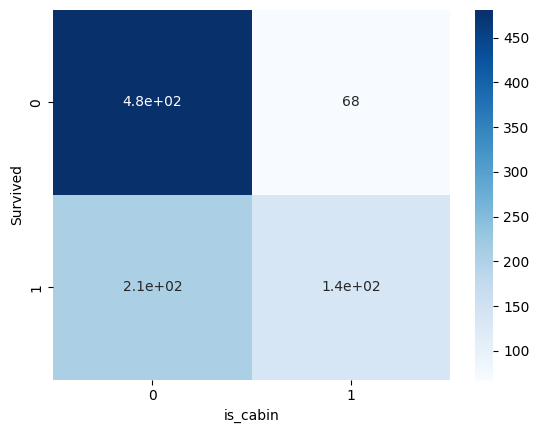

In [90]:
t3=pd.crosstab(df['Survived'],df['is_cabin'])
sns.heatmap(t3,cmap='Blues',annot=True)
plt.show()

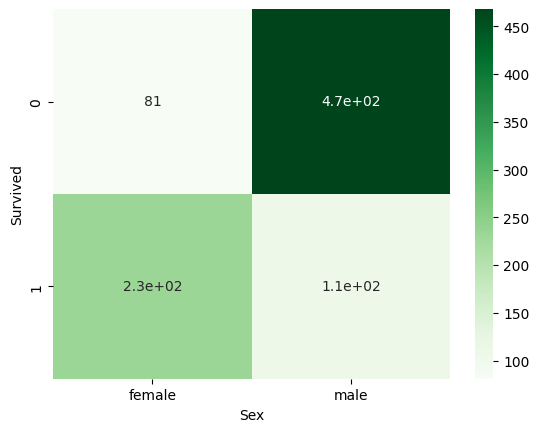

In [96]:
t4=pd.crosstab(df['Survived'],df['Sex'])
sns.heatmap(t4,cmap='Greens',annot=True)
plt.show()

## Lets find out the relationships and trends

## 1. Univariate analysis

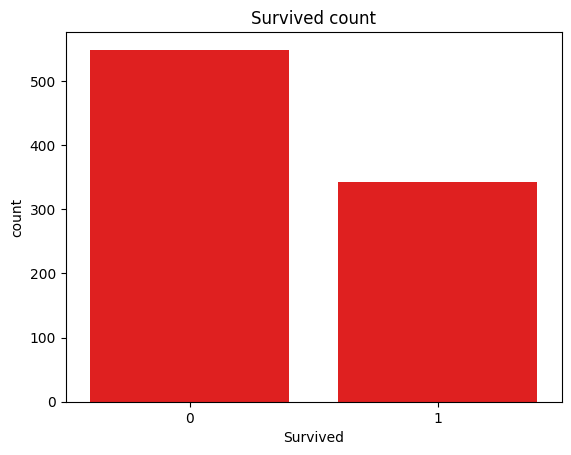

In [108]:
sns.countplot(x='Survived',data=df,color='red')
plt.title('Survived count')
plt.show()
#as we can see the their is the imbalance in the categories of Survived column

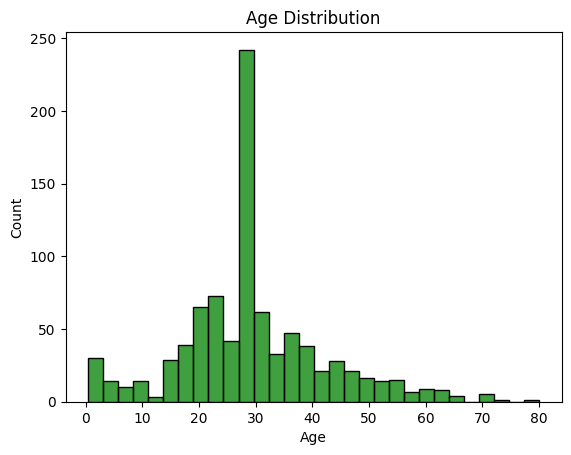

In [109]:
sns.histplot(data=df,x='Age',color='green')
plt.title('Age Distribution')
plt.show()
#it is looking like the normal distribution

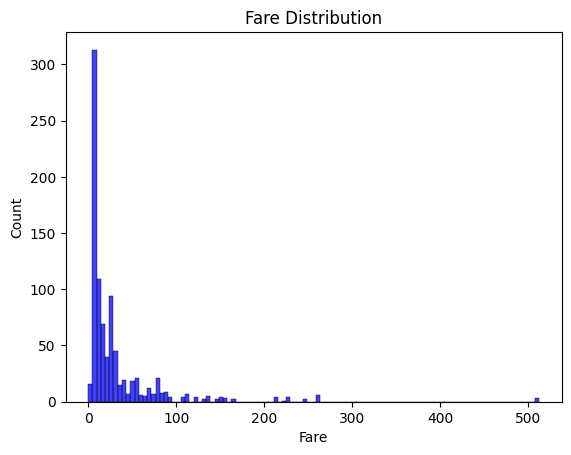

In [110]:
sns.histplot(data=df,x='Fare',color='blue')
plt.title('Fare Distribution')
#it is right skedwed
plt.show()


## 2. Bivariate analysis

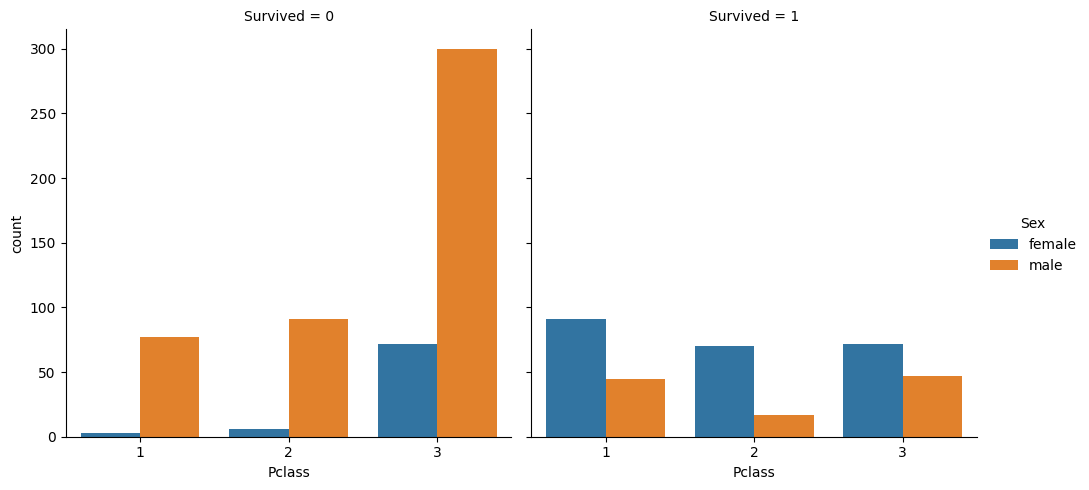

In [112]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df)
plt.show()



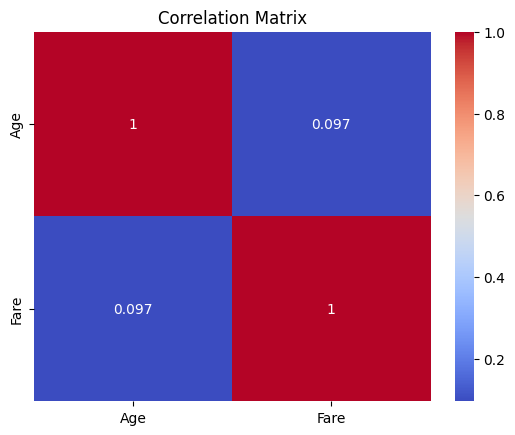

In [115]:
#finding the correlation between the numerical columns 

correlation = df[['Age', 'Fare']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#they are not highly correlated so no problem 


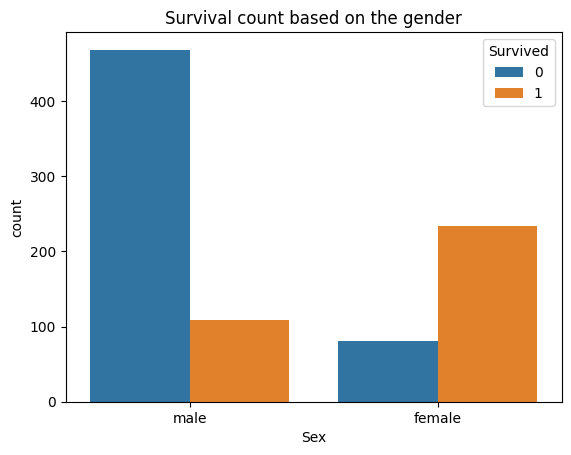

In [125]:
sns.countplot(x='Sex',data=df,hue='Survived') 
plt.title('Survival count based on the gender')
plt.show()

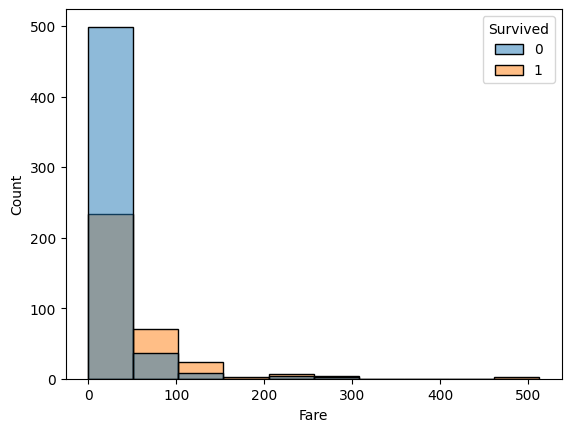

In [133]:
sns.histplot(data=df,x='Fare',hue='Survived',color='red',bins=10)
plt.show()

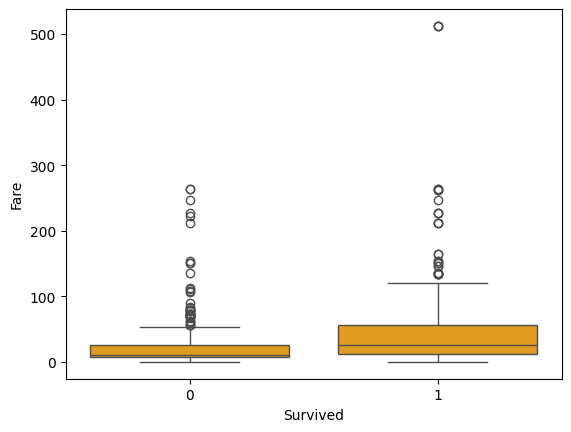

In [138]:

sns.boxplot(data=df,x='Survived',y='Fare',color='orange')
plt.show()

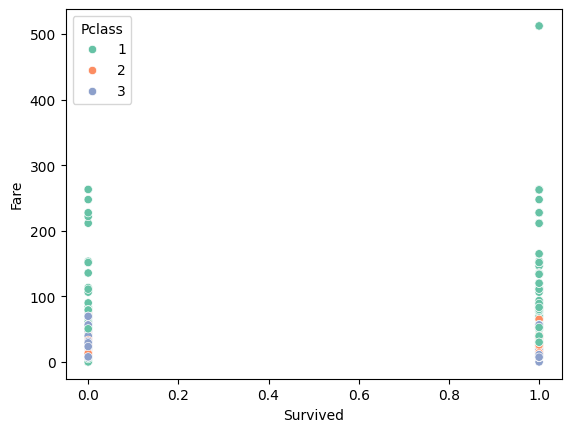

In [ ]:
sns.scatterplot(data=df,x='Survived',y='Fare',hue='Pclass',palette='Set2')
#as we can see that the people with the higher fare are in first classs
#and they have more chances of survival 
plt.show()

## 3. Multivariate Analysis

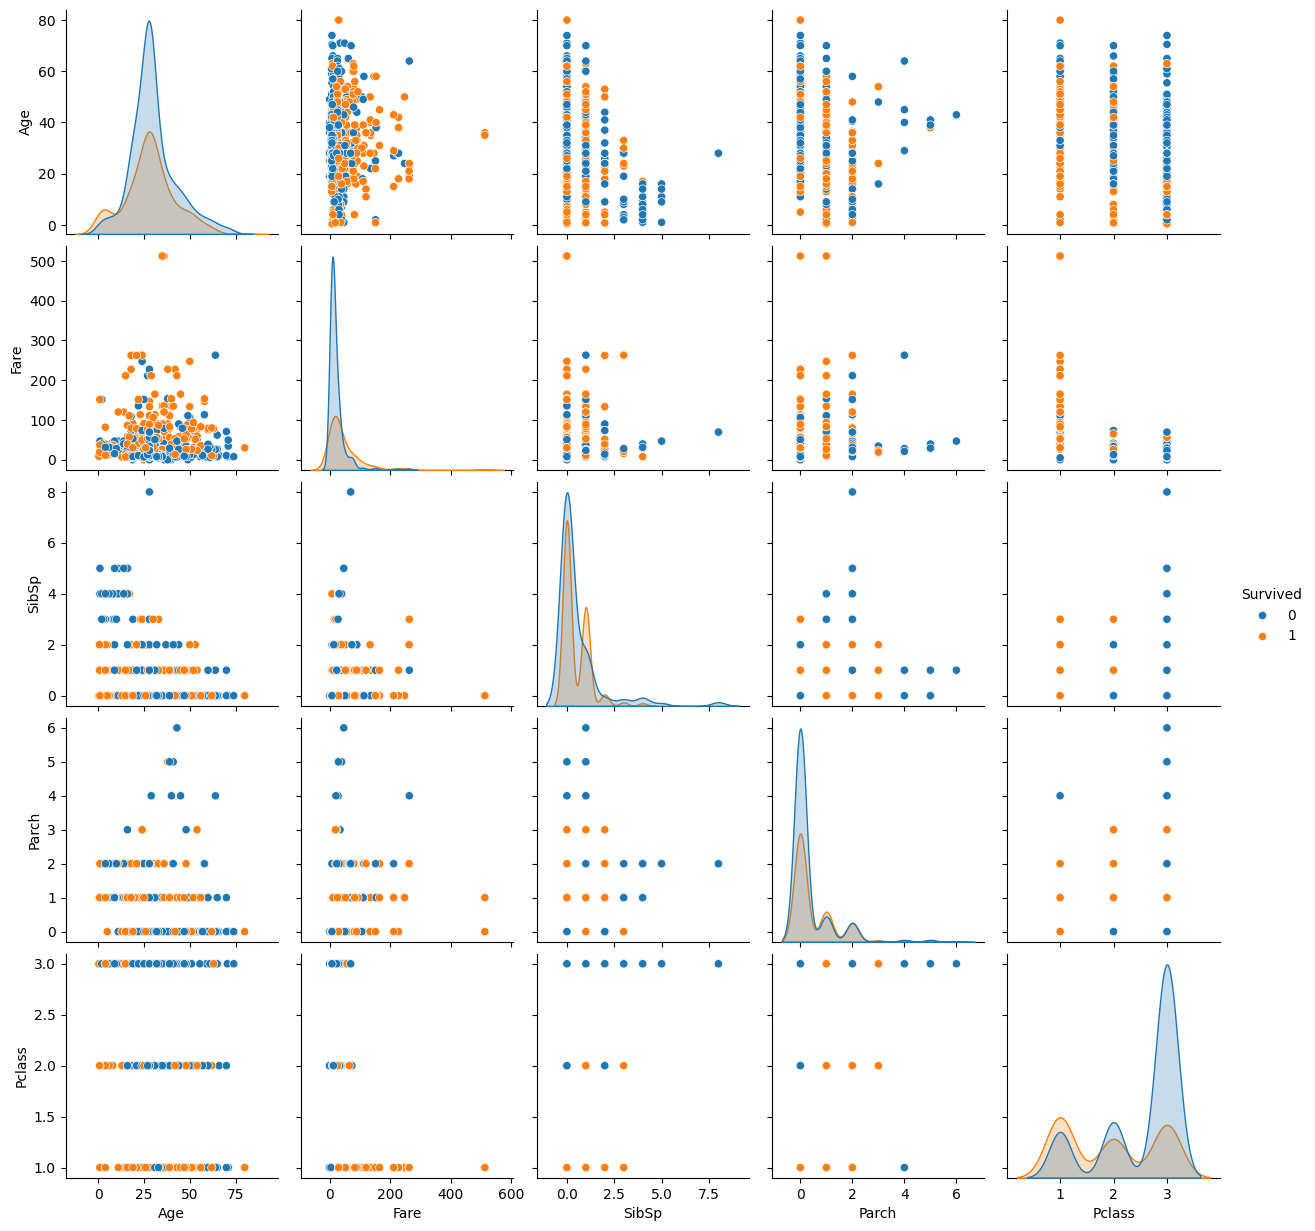

In [122]:
sns.pairplot(df[columns+['Survived']],hue='Survived') #by default it will plot the scatter plot fo all the columns that are given to it

plt.show()


<Axes: xlabel='Sex', ylabel='count'>

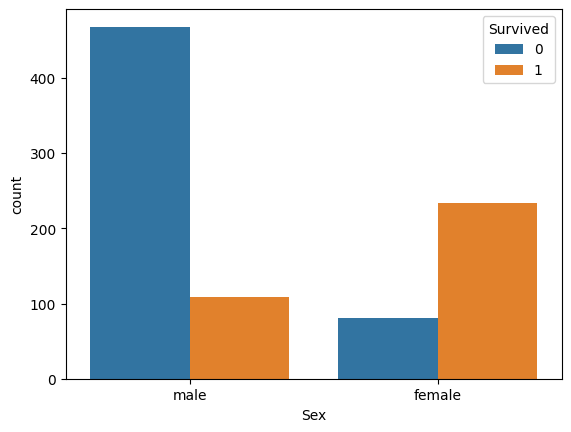

In [124]:
sns.countplot(x='Sex',data=df,hue='Survived') 
plt.title('Survival count based on the gender')
plt.show()

## Insights and the summary 
#### 1. Gender and survival: Female had high survival rate then men
#### 2. Passenger class and Survival: 1st class had more survival rate
#### 3. Age and  Survival: Children had high survival rate.
#### 4. Fare and Pclass: Person who paid more or person in a first class have high survival rate

In [ ]:
#command for converting the jupyter notebook to pdf
#!pip install nbconvert 
# jupyter nbconvert --to pdf your_notebook.ipynb



[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
